In [1]:
import numpy as np
from urllib import request
import gzip

In [2]:
filename = [
["x_train", "train-images-idx3-ubyte.gz"],
["x_test", "t10k-images-idx3-ubyte.gz"],
["y_train", "train-labels-idx1-ubyte.gz"],
["y_test", "t10k-labels-idx1-ubyte.gz" ],
]

base_url = "http://yann.lecun.com/exdb/mnist/"

for n in filename:
  request.urlretrieve(base_url+n[1],n[1])
  print(n[1])
  print("%s downloaded " % base_url+n[1])

print("download has been completed.")

train-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz
http://yann.lecun.com/exdb/mnist/ downloaded t10k-labels-idx1-ubyte.gz
download has been completed.


In [3]:
mnist = {}
for name in filename[:2]:
  with gzip.open(name[1], 'rb') as f:
    mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset = 16).reshape(-1,28,28)

for name in filename[2:]:
  with gzip.open(name[1], 'rb') as f:
    mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset = 8).reshape(-1,1)

In [4]:
print(mnist['x_train'].shape)
print(mnist['y_train'].shape)
print(mnist['x_test'].shape)
print(mnist['y_test'].shape)

(60000, 28, 28)
(60000, 1)
(10000, 28, 28)
(10000, 1)


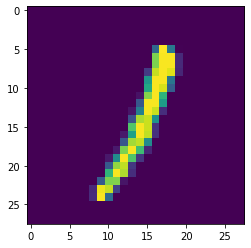

In [5]:
import matplotlib.pyplot as plt

img = mnist['x_train'][99,:]
plt.imshow(img)
plt.show()

In [6]:
print(mnist['y_train'][99])

[1]


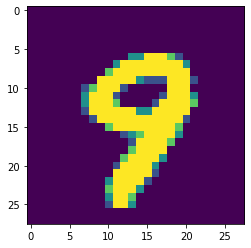

In [7]:
img = mnist['x_train'][5999,:]
plt.imshow(img)
plt.show()

In [8]:
print(mnist['y_train'][5999])

[9]


In [9]:
x_train, y_train, x_test, y_text = mnist['x_train'], mnist['y_train'], mnist['x_test'], mnist['y_test']

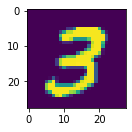

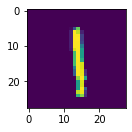

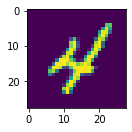

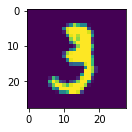

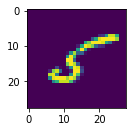

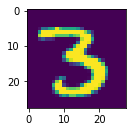

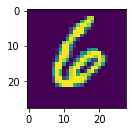

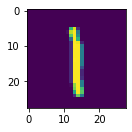

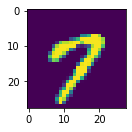

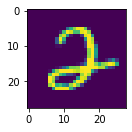

In [10]:
# 연습문제 1. (pyplot)
# x_train data 로부터 i 번째에서부터 시작하는 이미지를 10 개를 동시에 출력해 봅시다.
# 
import numpy as np
import matplotlib.pyplot as plt

#for i in range(5):
#  image = x_train[i,:]
#  plt.subplot(2,2,1)
#  plt.imshow(image)
#  plt.show()

def draw_10_images(i):
  images = x_train[i:i+10]
    
  for img in images:
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.show()
  
draw_10_images(7) # x_train data의 7번째부터 시작하여 차례대로 10개의 이미지를 동시에 출력



In [50]:
# 연습문제 2. x_train 에서 각각의 0, 1, 2, ..., 9 각각의 데이터셋은 몇개씩이나 있을까요?

# your code here
import numpy as np

#def count_x_train(i): # iteration method
#  count = 0
#  y_train_num = y_train[:]
#  for num in y_train_num:
#    if num  == i :
#      count += 1
#  return count
  
#count_x_train(2)

def count_number(i):
   #y_train_array = np.array(y_train) 
   #print(y_train_array) # print y_train label
   #bool_idx = (y_train_array == i)
   #print(bool_idx) # y_train label에서 i 값과 동일할 경우에는 True로 Mask, 다를 경우에는 False로 Mask
   print(np.count_nonzero(y_train_array == i))

count_number(2)


5958


In [17]:
# 연습문제 3. 0~9 까지를 분류하는 multi-class classification 은 pytorch 를 이용해서 매우 손쉽게 풀어볼 예정이구요. 
# 학습을 위해서 0,1 숫자 두개는 특별히 분류해서 numpy 를 이용해서 직접 logistic regression 을 돌려볼려고 합니다. 
# 0,1 만 존재하는 x_train, y_train, x_test, y_test 를 만들어 보도록 합시다. 

y_train_label = y_train[:]
print(y_train_label) # print total y_train label
print(len(y_train_label)) # number of y_train label #60000개

mask = y_train_label < 2 # y_train_label에서 2보다 작은 원소를 mask array로 지정, 따라서 0과 1만 True value를 나타내고 나머지는 False
print(mask)

b = y_train_label[mask].reshape(-1,1) # y_train_label row array 에서 column array 로 변환
print(b.shape, len(b))
print(b)

[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]
60000
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]
(12665, 1) 12665
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]
